In [39]:
import pandas as pd
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
data = pd.read_csv('MMG_district_df_clean.csv').dropna()

In [3]:
data.head()

,FIPS,State_Name,District_Name,Food_Insecurity_Rate,Num_Food_Insecure_Persons,Low_Threshold_State,Low_Threshold_Type,High_Threshold_State,High_Threshold_Type,Pct_FI_Below_Low_Threshold,Pct_FI_Between_Thresholds,Pct_FI_Above_High_Threshold,Child_Food_Insecurity_Rate,Num_Food_Insecure_Children,Pct_FI_Children_Below_185FPL,Pct_FI_Children_Above_185FPL,Year
0,101,AL,"Congressional District 1 (116th Congress), Ala...",0.164,117560,1.3,SNAP,1.85,Other Nutrition Program,0.500,0.163,0.337,0.223,36250,0.76,0.24,2018
1,102,AL,"Congressional District 2 (116th Congress), Ala...",0.180,122290,1.3,SNAP,1.85,Other Nutrition Program,0.526,0.147,0.327,0.251,38440,0.75,0.25,2018
2,103,AL,"Congressional District 3 (116th Congress), Ala...",0.183,129360,1.3,SNAP,1.85,Other Nutrition Program,0.503,0.189,0.308,0.244,37520,0.81,0.19,2018
3,104,AL,"Congressional District 4 (116th Congress), Ala...",0.166,114160,1.3,SNAP,1.85,Other Nutrition Program,0.488,0.221,0.291,0.239,37130,0.92,0.08,2018
4,105,AL,"Congressional District 5 (116th Congress), Ala...",0.146,106250,1.3,SNAP,1.85,Other Nutrition Program,0.424,0.172,0.405,0.194,30600,0.77,0.23,2018


In [4]:
data.columns

Index(['FIPS', 'State_Name', 'District_Name', 'Food_Insecurity_Rate',
       'Num_Food_Insecure_Persons', 'Low_Threshold_State',
       'Low_Threshold_Type', 'High_Threshold_State', 'High_Threshold_Type',
       'Pct_FI_Below_Low_Threshold', 'Pct_FI_Between_Thresholds',
       'Pct_FI_Above_High_Threshold', 'Child_Food_Insecurity_Rate',
       'Num_Food_Insecure_Children', 'Pct_FI_Children_Below_185FPL',
       'Pct_FI_Children_Above_185FPL', 'Year'],
      dtype='object')

In [ ]:
#All numeric variables
numericCols = [
    'Food_Insecurity_Rate', 'Num_Food_Insecure_Persons', 'Low_Threshold_State',
    'High_Threshold_State', 'Pct_FI_Below_Low_Threshold', 'Pct_FI_Between_Thresholds',
    'Pct_FI_Above_High_Threshold', 'Child_Food_Insecurity_Rate',
       'Num_Food_Insecure_Children', 'Pct_FI_Children_Below_185FPL',
       'Pct_FI_Children_Above_185FPL'
]

In [6]:
subData = data[numericCols]

In [ ]:
#BECIN PCA PROCESS
scaler = StandardScaler()
scaled = scaler.fit_transform(subData)

pca = PCA()
xPCA = pca.fit_transform(scaled)


In [21]:
pca.components_[1]

array([-0.08998319, -0.07913453,  0.57997878,  0.49668137,  0.30390607,
       -0.5485732 ,  0.01516784, -0.02481373, -0.04561385, -0.0560692 ,
        0.05666883])

In [22]:
pca.explained_variance_ratio_

array([4.63410698e-01, 2.52080229e-01, 1.42535557e-01, 5.56948987e-02,
       4.08951508e-02, 2.32004843e-02, 1.32932405e-02, 7.01654169e-03,
       1.85319200e-03, 1.96518231e-05, 3.56566773e-07])

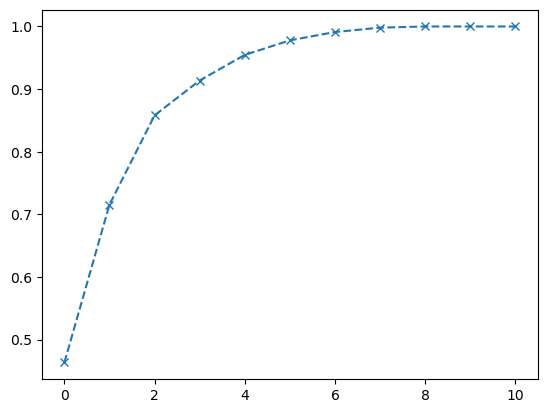

In [ ]:
#Checks number of Principal Components we want
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'x', linestyle = '--')

In [28]:
pca = PCA(n_components=2)
xPCA = pca.fit(scaled)
transformedPCA = xPCA.transform(scaled)
transformedPCA.shape

(3120, 2)

In [ ]:
#Fit PCA
kmeansPCA = KMeans(n_clusters=3, init = 'k-means++', random_state=67)
kmeansPCA.fit(transformedPCA)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,67
,copy_x,True
,algorithm,'lloyd'


In [31]:
subData['pcaGroup'] = kmeansPCA.labels_

C:\Users\maxel\AppData\Local\Temp\ipykernel_912\2560588456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subData['pcaGroup'] = kmeansPCA.labels_


In [ ]:
#Add in PCA cluster to main df just in case and count values
subData['pcaGroup'].value_counts()

pcaGroup
1    1313
2    1273
0     534
Name: count, dtype: int64

In [ ]:
#Make PCA df
pcaDF = pd.DataFrame(xPCA)
pcaDF.head()

,0,1,2
0,0.542229,-1.319321,0.721430
1,1.007439,-1.209842,0.312300
2,1.416481,-1.626843,0.721682
3,1.772928,-1.913380,1.936902
4,-0.408868,-1.449629,1.104383


In [ ]:
#Add in cluster label for pca kmeans
pcaDF['cluster'] = kmeansPCA.labels_
pcaDF.head()

,0,1,2,cluster
0,0.542229,-1.319321,0.721430,2
1,1.007439,-1.209842,0.312300,2
2,1.416481,-1.626843,0.721682,2
3,1.772928,-1.913380,1.936902,2
4,-0.408868,-1.449629,1.104383,2


In [41]:
names = ['prinOne', 'prinTwo', 'prinThree', 'cluster']
pcaDF.columns = names

<Axes: xlabel='prinOne', ylabel='prinTwo'>

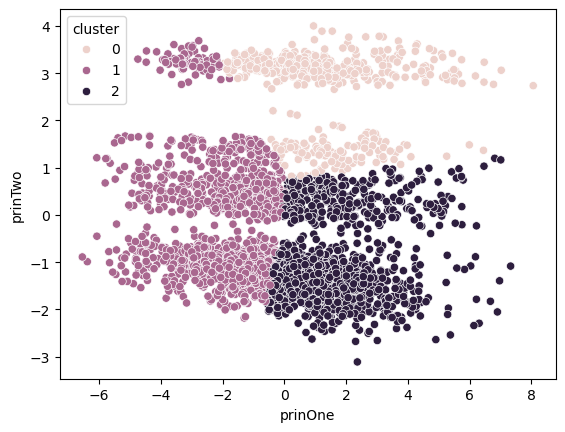

In [44]:
sns.scatterplot(pcaDF, x = 'prinOne', y = 'prinTwo', hue = 'cluster')

<Axes: xlabel='prinTwo', ylabel='prinThree'>

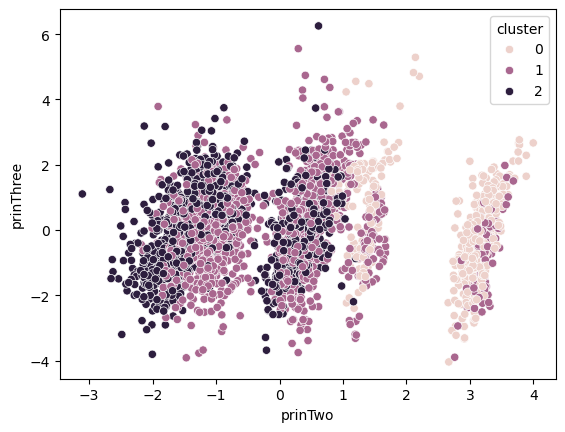

In [45]:
sns.scatterplot(pcaDF, x = 'prinTwo', y = 'prinThree', hue = 'cluster')

<Axes: xlabel='prinOne', ylabel='prinThree'>

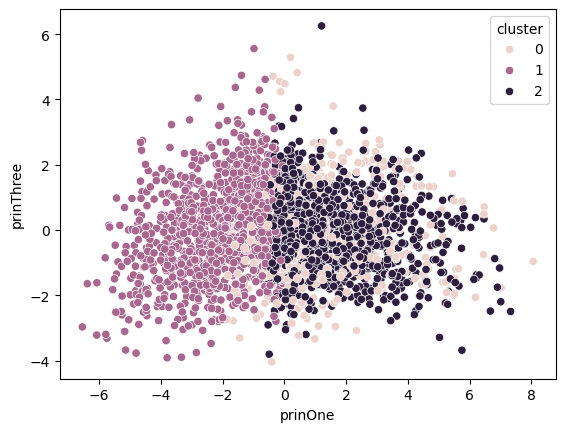

In [46]:
sns.scatterplot(pcaDF, x = 'prinOne', y = 'prinThree', hue = 'cluster')

In [ ]:
#THIS BEGINS NON PCA KMEANS
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=4, init="k-means++", n_init=15, random_state=67))
])

pipe.fit(subData)
labels = pipe["kmeans"].labels_
centroids = pipe['kmeans'].cluster_centers_
centroids


array([[-0.93210911, -0.92362529,  0.11535733, -0.082267  , -0.95241194,
        -0.28496022,  1.23819537, -1.03626845, -0.81062686, -1.3448311 ,
         1.34482798],
       [ 0.23930558,  0.25769284,  1.75367622,  2.1687478 ,  1.09080735,
        -1.33843926, -0.35015726,  0.49189574,  0.2104108 ,  0.18981815,
        -0.18875786],
       [-0.2380534 , -0.23196592, -0.44136071, -0.43581114, -0.23719232,
         0.35385238,  0.03588584, -0.27054615, -0.26181401,  0.14336058,
        -0.14379241],
       [ 1.06572654,  1.03741629, -0.35154273, -0.43218031,  0.59012676,
         0.40692955, -0.91504703,  1.06460306,  1.01970617,  0.79027982,
        -0.7901466 ]])

In [80]:
data["cluster"] = labels.astype(str)
data["cluster"].unique()

array(['2', '3', '0', '1'], dtype=object)

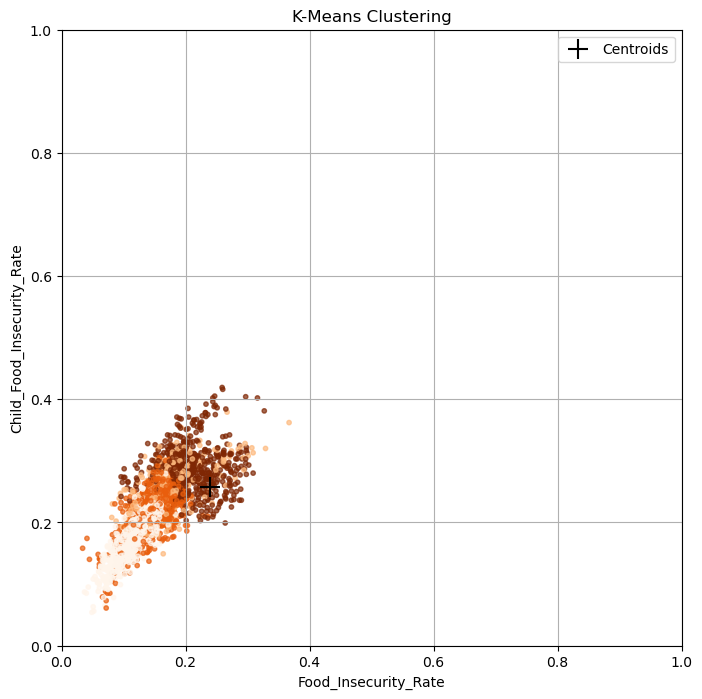

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(data['Food_Insecurity_Rate'], data['Child_Food_Insecurity_Rate'], c=labels, cmap='Oranges', s=10, alpha=0.7)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, c= 'black', label='Centroids')
plt.xlim(0,1)
plt.ylim(0,1)

plt.title('K-Means Clustering')
plt.xlabel('Food_Insecurity_Rate')
plt.ylabel('Child_Food_Insecurity_Rate')
plt.legend()
plt.grid(True)
plt.show()

#Problem seems to stem from the centroids not being plotted properly

#Another easy idea would be to cluster at state level and compare the overlay by county to see if there was overlap

In [78]:
K_values = list(range(1, 15))
wcss = []

for k in K_values:
    pipe.set_params(kmeans__n_clusters=k)
    pipe.fit(subData)
    inertia = pipe["kmeans"].inertia_
    wcss.append(inertia)


fig = px.line(
    x=K_values,
    y=wcss,
    markers=True,
    title="Elbow Plot",
    labels={"x": "Number of Clusters", "y": "WCSS"}
)

fig.update_layout(height=500, width=800)
fig.show()

In [77]:
sil_scores = []
K_values_sil = list(range(2, 15))

for k in K_values_sil:
    pipe.set_params(kmeans__n_clusters=k)
    pipe.fit(subData)

    labels = pipe["kmeans"].labels_

    sil = silhouette_score(subData, labels)

    sil_scores.append(sil)


fig = px.line(
    x=K_values_sil,
    y=sil_scores,
    markers=True,
    title="Silhouette Scores",
    labels={"x": "Number of Clusters", "y": "Silhouette Score"}
)

fig.update_layout(height=500, width=800)
fig.show()